# Project: Sentiment Analysis on Yahoo News on the topic of UK cronavirus

<font color='red'>Reminder: 
<br>As the yahoo news website will be updated in **real time**, I divided part 1 into two sections. In section 1, you can get the data from yahoo news in real time and I will print the result for you. 
    
<br>In section 2, in order to replicate my outcomes and match it with my analysis at the bottom of my notebook, I ran the programme on 21-Dec-2020 and captured raw data on 21-Dec-2020 in the zip file. I will open the raw data file in this jupyter notebook and use the data on 21-Dec-2020 afterwards to replicate my outcomes.</font> 

## Introduction
The purpose of this project is to firtsly acquire data online using web scrapping techniques and secondly do relevant sentiment analysis both in quantitative and qualitative ways.

Here I use Yahoo News to do web scrapping as it has organized html formats with available information, so I can use BeautifulSoup to find related tags and classes and get the information needed.

# Part 1 Acquire data from yahoo news
After input keyword in yahoo news search, I use beautiful soup to get all searched news headline, short description, posted time and links. I will also export those information as csv format data.

# Section 1: Get Yahoo News Data in Real Time

In [13]:
# Import necessary Python libraries
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import datetime

I have added docstrings for all of functions below:

In [14]:
def get_soup (URL):
    """
    Build connection with yahoo news website with searching keywords input
            
            Input:
                URL
            
            Returns:
                soup 
    """
    
    request_headers = {
        'accept': '*/*',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'referer': 'https://www.google.com',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
    }

    r = requests.get(URL, headers=request_headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    return soup

In [15]:
def get_article_info (news):
    """
    For each news article, I extract information needed including headline, description, post time, date, source, link
            
            Input:
                news: html codes processed by BeautifulSoup
            
            Returns:
                article
    """
    headline = news.find('h4', 's-title').text
    source = news.find('span', 's-source').text       
    description = news.find('p', 's-desc').text.strip()
    
    # Process the raw link information by regular expression
    link = news.find('a').get('href')
    
    # Because the raw post time information is in the format of 'x hours ago' or 'x days ago', I would like to change the format into date for data analysis in part 2
    post_time = news.find('span', 's-time').text.replace('·', '').strip()
    if 'hour' in post_time:
        date = datetime.date.today()
    elif 'minute' in post_time:
        date = datetime.date.today()
    elif 'day' in post_time:
        days_ago = int(post_time.split()[0])
        timedelta = datetime.timedelta(days=days_ago)
        date = datetime.date.today() - timedelta
    
    article = (headline, description, post_time, date, source, link)
    return article

In [16]:
def get_articles (keywords):
    """
    Browse all results page by page and store them in articles in pandas dataframe format
            
            Input:
                keywords (str): Searching keywords
            
            Returns:
                articles
    """
    url = 'https://news.search.yahoo.com/search?p=' + keywords
    links = set()
    articles = []

    while url is not None:
        #Find all 'div' tag with class called 'NewsArticle', so that we can find all news containers on the same page
        soup = get_soup(url)
        news_on_same_page = soup.find_all ('div', 'NewsArticle')
        for news in news_on_same_page:
            article = get_article_info(news)
            # There are duplicated links in the website searching result, need to get rid of duplicated results
            link = article[-1]
            if link not in links:
                links.add(link)
                articles.append(article)
        
        #go to next page
        try:
            url = soup.find('a', 'next').get('href')
        # In the last page, there will be no "next" botton in the web page, so I will set url as none to break the loop
        except AttributeError:
            url = None

    articles = pd.DataFrame(articles, columns = ['Headline', 'Short Description', 'Post Time', 'Post Date', 'Source', 'Link'])
    return articles

Constructed all functions needed. I will run the main programme get_articles as below. It may take some time as there are maybe thousands of results and hundreds of web pages to be scrapped.

In [17]:
keywords = 'UK coronavirus'
articles_real_time = get_articles (keywords)
articles_real_time

,Headline,Short Description,Post Time,Post Date,Source,Link
0,"Covid news — live: UK deaths pass 80,000 as an...",The UK’s coronavirus death toll has risen past...,10 hours ago,2021-01-10,The Independent via Yahoo News,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
1,First Case Of UK Coronavirus Variant Found On ...,Days after the first case of the UK variant of...,11 hours ago,2021-01-10,Patch via Yahoo News,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
2,"UK becomes first country in Europe to pass 80,...",The UK has become the first country in Europe ...,1 day ago,2021-01-09,The Telegraph via Yahoo News,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
3,Covid news: UK records highest daily death tol...,"The UK has reported 1,325 more coronavirus dea...",1 day ago,2021-01-09,The Independent via Yahoo News,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
4,"UK coronavirus daily death toll tops 1,000 for...","The UK has recorded more than 1,000 daily COVI...",4 days ago,2021-01-06,Yahoo News UK,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
5,"UK Covid cases break another record with 60,91...",UK coronavirus cases have reached another reco...,4 days ago,2021-01-06,The Independent via Yahoo News,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
6,I volunteered to test the Moderna coronavirus ...,Journalist Elle Hardy is taking part in a phas...,2 days ago,2021-01-08,Business Insider via Yahoo News,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
7,Rishi Sunak set to delay plans for tax rises i...,Chancellor Rishi Sunak is expected to delay pl...,13 hours ago,2021-01-10,Yahoo Finance UK,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
8,"Coronavirus: Lockdown rules are too lax, gover...",Government scientific advisors have urged Bori...,11 hours ago,2021-01-10,The Independent via Yahoo News,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...
9,New UK Coronavirus Strain Detected In NY,The strain doesn’t appear resistant to newly-d...,5 days ago,2021-01-05,Patch via Yahoo News,https://r.search.yahoo.com/_ylt=AwrXoCG_lfpfUz...


In [18]:
#Export the result to csv file
articles_real_time.to_csv('raw_news_data_real_time.csv', index=False)

# Section 2: Import the data obtained on 21-Dec-2020 to replicate outcomes below

In [19]:
articles = pd.read_csv ("raw_news_data_Dec_21.csv")
articles

,Headline,Short Description,Post Time,Post Date,Source,Link
0,Which countries have banned travel from the UK...,A new strain of coronavirus discovered in the ...,22 minutes ago,2020-12-21,The Independent via Yahoo News,https://www.yahoo.com/lifestyle/full-list-coun...
1,"New COVID strain could cause 'very, very many ...",People in the UK must reduce their social cont...,37 minutes ago,2020-12-21,Yahoo News UK,https://news.yahoo.com/coronavirus-new-covid-s...
2,'Out of control': How the rest of Europe is re...,The UK has been shut off from several European...,2 hours ago,2020-12-21,Yahoo News UK,https://news.yahoo.com/new-coronavirus-strain-...
3,India halts UK flights amid new virus strain f...,India has decided to halt flights to and from ...,46 minutes ago,2020-12-21,BBC via Yahoo News,https://news.yahoo.com/india-halts-uk-flights-...
4,EU could ban UK flights over Covid strain as B...,Berlin will push for a complete pause on all e...,22 minutes ago,2020-12-21,The Telegraph via Yahoo News,https://news.yahoo.com/eu-could-ban-uk-flights...
5,"Travel bans on UK flights, ferries and trains:...",Countries across Europe and the world are impo...,4 hours ago,2020-12-21,The Independent via Yahoo News,https://www.yahoo.com/lifestyle/travel-bans-uk...
6,Europe on High Alert After UK Identifies New C...,UK Prime Minister Boris Johnson announced Sund...,11 hours ago,2020-12-21,Complex via Yahoo News,https://www.yahoo.com/entertainment/europe-hig...
7,"Covid: Mutant strain found in Denmark, Netherl...",A new strain of coronavirus identified in part...,2 hours ago,2020-12-21,The Independent via Yahoo News,https://news.yahoo.com/covid-mutant-strain-fou...
8,UK travel news live - India and France join tr...,More than dozen countries have announced the s...,1 hour ago,2020-12-21,The Independent via Yahoo News,https://news.yahoo.com/uk-travel-news-live-ind...
9,New York governor Andrew Cuomo calls for UK fl...,Cuomo has sought a ban on flights coming from ...,1 hour ago,2020-12-21,The Independent via Yahoo News,https://news.yahoo.com/york-governor-andrew-cu...


# Part 2 Sentiment Analysis and Word Cloud

Based on headlines we got from part 1, I will firstly process the word (tokenization and stemming). Secondly, I will use nltk library to do sentiment analysis by date in a quantitative way and use word cloud function to get a general idea of the sentiment in a qualitatitive way.

In [20]:
#Import necessary libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
porter = PorterStemmer()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\David
[nltk_data]     Xu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\David
[nltk_data]     Xu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\David
[nltk_data]     Xu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
def preprocess (text):
    """
    Preprocess headlines including changing to lower cases, removing all punctuations and stop words , porter stemming
            
            Input:
                text
            
            Returns:
                clean_sentence: Sentence after processing so that it can be processed by sentiment analyzer from nlkt afterwards
                clean_words: To create word cloud afterwards
    """
    # Convert text to all lower cases and no punctuations in order to tokenize all words
    lower_no_punc_text = text.lower().translate(str.maketrans('','',string.punctuation))
    tokenized_words = lower_no_punc_text.split()
    
    # There are many stop words which are meaningless like he, she, it. I also add another delete_list manually as I want other words which are not covered by nltk stoplist to be deleted
    stop_list = stopwords.words('english')
    delete_list = ['the']
    delete_list = stop_list + delete_list
    
    clean_words = []
    
    # Stemming text and remove stop words
    for word in tokenized_words:
        if word not in delete_list:
            word = porter.stem(word)
            clean_words.append(word)
    clean_sentence = " ".join(clean_words)
    return clean_sentence, clean_words

Run preprocess function above to get clean_headline and clean_words. Also run sentiment analysis function from nlkt to get sentiment scores. It may take some time to run the function due to the loop function and nlkt's analysis

In [22]:
articles['Negative Score'] = np.nan
articles['Neutral Score'] = np.nan
articles['Positive Score'] = np.nan
articles['Overall Score'] = np.nan 

clean_words_list = []
for ind in articles.index:
    clean_headline, clean_words = preprocess(articles['Headline'][ind])
     # Store all clean_words in a list for the purpose of constructing word cloud in the next step
    for word in clean_words:
        clean_words_list.append(word)
    score = SentimentIntensityAnalyzer().polarity_scores(clean_headline)
    # Add four columns for negative score, neutral score, positive score and overall score which will be generated from the sentiment analyzer function of nltk  
    articles['Negative Score'][ind] = score['neg']
    articles['Neutral Score'][ind] = score['neu']
    articles['Positive Score'][ind] = score['pos']
    articles['Overall Score'][ind] = score['compound'] #The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive)

C:\Users\David Xu\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David Xu\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\David Xu\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\David Xu\Downloads\Anaconda\lib\si

In [23]:
# Export another csv file with sentiment scores columns
articles.to_csv('news_with_sentiment_score_Dec_21.csv', index=False)
articles

,Headline,Short Description,Post Time,Post Date,Source,Link,Negative Score,Neutral Score,Positive Score,Overall Score
0,Which countries have banned travel from the UK...,A new strain of coronavirus discovered in the ...,22 minutes ago,2020-12-21,The Independent via Yahoo News,https://www.yahoo.com/lifestyle/full-list-coun...,0.419,0.581,0.000,-0.5574
1,"New COVID strain could cause 'very, very many ...",People in the UK must reduce their social cont...,37 minutes ago,2020-12-21,Yahoo News UK,https://news.yahoo.com/coronavirus-new-covid-s...,0.338,0.662,0.000,-0.6249
2,'Out of control': How the rest of Europe is re...,The UK has been shut off from several European...,2 hours ago,2020-12-21,Yahoo News UK,https://news.yahoo.com/new-coronavirus-strain-...,0.146,0.854,0.000,-0.0516
3,India halts UK flights amid new virus strain f...,India has decided to halt flights to and from ...,46 minutes ago,2020-12-21,BBC via Yahoo News,https://news.yahoo.com/india-halts-uk-flights-...,0.386,0.614,0.000,-0.5267
4,EU could ban UK flights over Covid strain as B...,Berlin will push for a complete pause on all e...,22 minutes ago,2020-12-21,The Telegraph via Yahoo News,https://news.yahoo.com/eu-could-ban-uk-flights...,0.304,0.696,0.000,-0.5859
5,"Travel bans on UK flights, ferries and trains:...",Countries across Europe and the world are impo...,4 hours ago,2020-12-21,The Independent via Yahoo News,https://www.yahoo.com/lifestyle/travel-bans-uk...,0.340,0.660,0.000,-0.5574
6,Europe on High Alert After UK Identifies New C...,UK Prime Minister Boris Johnson announced Sund...,11 hours ago,2020-12-21,Complex via Yahoo News,https://www.yahoo.com/entertainment/europe-hig...,0.105,0.702,0.193,0.2500
7,"Covid: Mutant strain found in Denmark, Netherl...",A new strain of coronavirus identified in part...,2 hours ago,2020-12-21,The Independent via Yahoo News,https://news.yahoo.com/covid-mutant-strain-fou...,0.167,0.833,0.000,-0.0516
8,UK travel news live - India and France join tr...,More than dozen countries have announced the s...,1 hour ago,2020-12-21,The Independent via Yahoo News,https://news.yahoo.com/uk-travel-news-live-ind...,0.214,0.655,0.131,-0.3400
9,New York governor Andrew Cuomo calls for UK fl...,Cuomo has sought a ban on flights coming from ...,1 hour ago,2020-12-21,The Independent via Yahoo News,https://news.yahoo.com/york-governor-andrew-cu...,0.430,0.570,0.000,-0.7783


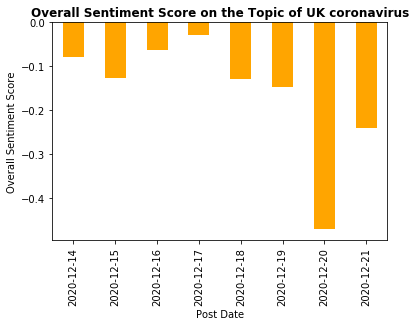

In [24]:
def bar_chart_sentiment (articles, keywords):
    """
    Output bar chart with x-axis in date, y-axis in overall sentiment score so that we can find patterns or trends of recent sentiment of the news we searched
            Input:
                articles: raw data got from part 1
                keywords
            
            Returns:
                bar chart
    """
    overall_score = articles.groupby('Post Date')['Overall Score'].mean()
    ax = overall_score.plot(kind='bar', color='orange')
    ax.set_ylabel("Overall Sentiment Score")
    ax.set_title('Overall Sentiment Score on the Topic of {}'.format(keywords), fontweight ="bold") 

bar_chart_sentiment (articles, keywords)

In [25]:
# Drop all date groups with less than certain number of articles
# For example, if in December 15th, there is only one news with very high positive sentiment score, it may distort the bar chart as above
# So in order to remove this outlier effect, I created a function to drop all date groups with small number of articles

def drop_small_dates (articles, n):
    """
    Drop groups with small sample sizes so that the bar chart can be more representative and will not be distorted by outlier data
            Input:
                articles: raw data got from part 1
                n (int): If sample size is smaller than n, I will drop this group 
                
            Returns:
                articles after dropping small groups
            
    """
    count_groupbydate_df = articles.groupby(['Post Date']).count()
    
    drop_date_list = []
    for ind in count_groupbydate_df.index:
        if count_groupbydate_df['Overall Score'][ind]<=n:
            drop_date_list.append(ind)

    for drop_date in drop_date_list:
        indexNames = articles[articles['Post Date']==drop_date].index
        articles.drop(indexNames, inplace=True)
    
    print ("Drop all date groups with less than ", n, " articles")
    return articles

Let's see whether bar chart will be changed after dropping small groups. If bar chart has no change, we can say the sample size in each date group is big enough for us to calculate mean of sentiment scores.

Drop all date groups with less than  20  articles


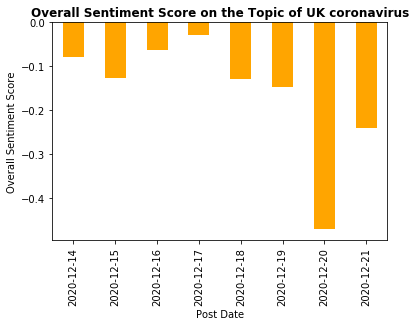

In [26]:
articles_after_drop = drop_small_dates (articles, 20)
bar_chart_sentiment (articles_after_drop, keywords)

After quantitative analysis above, we can use word cloud to get a rough idea what those news are about and re-confirm those quantitative scores by qualitative analysis.

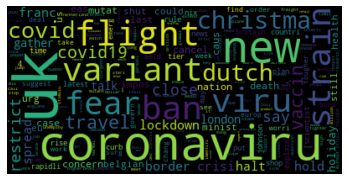

In [27]:
def word_cloud (clean_words_list):
    """
    Create word cloud
    """
    data_analysis = nltk.FreqDist(clean_words_list)
    wcloud = WordCloud().generate_from_frequencies(data_analysis)
    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

word_cloud (clean_words_list)

# Report Summary

## I. Project Implementation Steps
In part 1, with searching keywords input as **'UK Cronavirus'**, I used web scrapping techniques to download all information needed including headlines, short description, post time, post date, news source, link. I applied regular expression and BeatifulSoup find method to do preliminary data processing. Also, as the raw data only gives us post time in a relative way (e.g. "x days ago" or "x minutes ago", I further converted it into date in Python. Finally, I get the raw data in pandas dataframe format.

<br>In part 2, with raw data ready in the part 1, I further processed 'headline' column row by row in dataframe using a loop function. I converted them into all lower cases, remove all punctuations, remove stop words which are meaningless, tokenize the words and use porter stemming to reduce duplications. 

<br>With processed data ready, I applied sentiment analyzer function in nltk to give each headline a sentiment score (negative score, neutral score, positive score and overall score). We focus on overall or compound score here. ***The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).*** We export the csv file as a reference for further analysis later. 

<br>Then I created a bar chart grouped by post date, with y-axis being average overall sentiment score on that date to give me a rough idea about the trend of sentiment on the topic of **'UK Cronavirus'**. I also further created word cloud to see the most frequent words.

## II. Key Findings/Insights
In the project example with key word **'UK Cronavirus'**, for the bar chart as below, we can clearly observe that overall sentiment is negative as UK has quite severe coronavirus situation recently. Dec-20 and Dec-21 is especially negative with -0.25 to -0.45 score (less than -0.05 can indicate a relatively clear negative sentiment already). 

<br>If we look closely to the csv file we exported as above. We know that from Dec-19, new virus strain was initially found in UK and Boris Johnson started to impose a full lockdown on London. On Dec-20, UK health minister came out to suggest even tougher and tighter restrictions in London. European countries start to ban flights from and to the UK and the number of new cases surged to nearly 36k on that day. On Dec-21, the worry is still spreading.

<br> The reason why Dec-17 sentiment is relatively positive is that "UK extends salary support program to contain unemployment" lifted the sentiment.

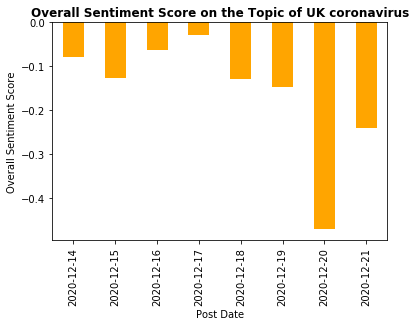

In [28]:
bar_chart_sentiment (articles_after_drop, keywords)

For the word cloud below, we can see some important words like ***"fear", "variant", "strain", "spread", 'restrict", "close", "flight" and "border".*** They are all indicating people's fearness towards the mutated virus and UK has lockdown and banned flights.

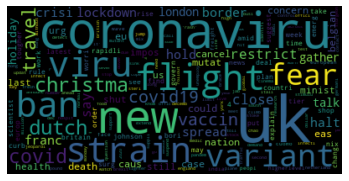

In [29]:
word_cloud (clean_words_list)

## III. Areas to Improve
Firstly, in terms of raw data, it seems that I can only download 700 to 1,000 news from yahoo news which equals to 70 to 100 pages of news about **'UK Cronavirus'**. the sample size may not be large enough. Maybe it is better to use websites with more news to scrap the web (actually, I have better websites to scrap news like finviz.com, but unfortunately, it is not on the top 50 websites list. 

<br>Also, I may get news that I don't want such as *"Ten of the world's richest people increase wealth by more than 450 billion during coronavirus..."* and *"What a joke: the 10 funniest comedy shows of 2020"*. The overall score is really high like 0.765 which may pollute my bar chart result.

<br>In addition, although I removed news with duplicated links, duplicated news with same information but different links still appear because different news agencies just copy with each other. However, it is not a serious problem as if an article is copied by various news agencies, it should weight more in the calculation.

<br>Finally, the sentiment analyzer function in nltk is not good enough. Some of negative news like *"UK orders shops to close, nixes holiday mixing in London"*, it gave high score like 0.4, which doesn't make sense.

## IV: Conclusion and Additional Files
Overall speaking, I believe the bar chart and word cloud can give the user a general picture on the trend of certain topic. If interested, the user can also open csv file with raw data to look into different news in details. But still, raw data quality and nltk sentiment analyzer algorithm can be improved.

<br>I saved csv files of raw data and data with sentiment scores and relevant pictures on 21-Dec-2020 in a zip file.

## References

Besides learning nltk functions and data visualisation methods in this course, I also learnt relevant coding techniques in following websites and applied in my project:

Marchetti, M., 2020. Sentiment Analysis on Financial News. [online] Kaggle. Available at: https://www.kaggle.com/mmmarchetti/sentiment-analysis-on-financial-news [Accessed 3 December 2020].

NTLK, 2020. Nltk.sentiment Package. [online] NTLK org. Available at: https://www.nltk.org/api/nltk.sentiment.html [Accessed 20 December 2020].

Ankthon, 2020. Python | Sentiment Analysis using VADER. [online] GreeksforGeeks. Available at: https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/ [Accessed 21 December 2020].